In [1]:
library(ggplot2)
library(dplyr)
library(corrplot)
library(car)
library(leaps)
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
white=read.csv("winequality-white.csv", sep = ";")
head(white)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


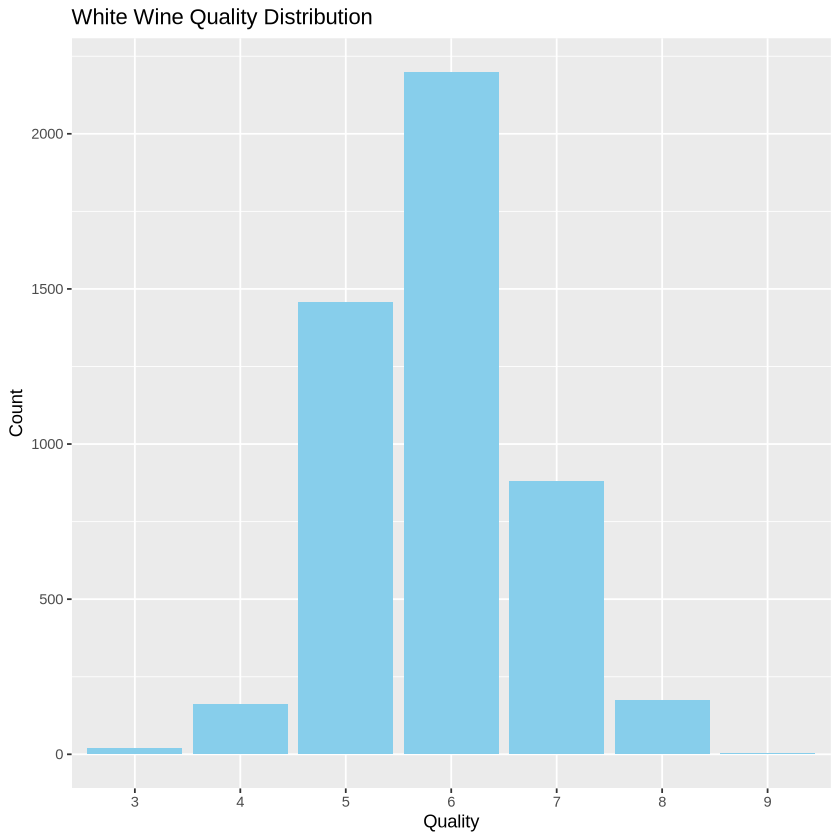

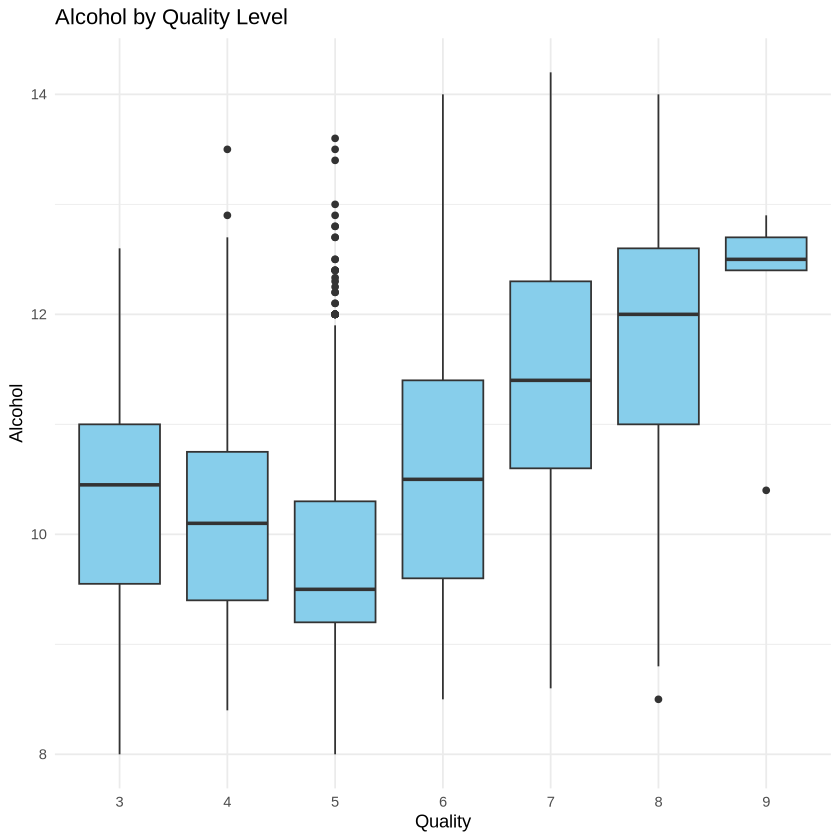

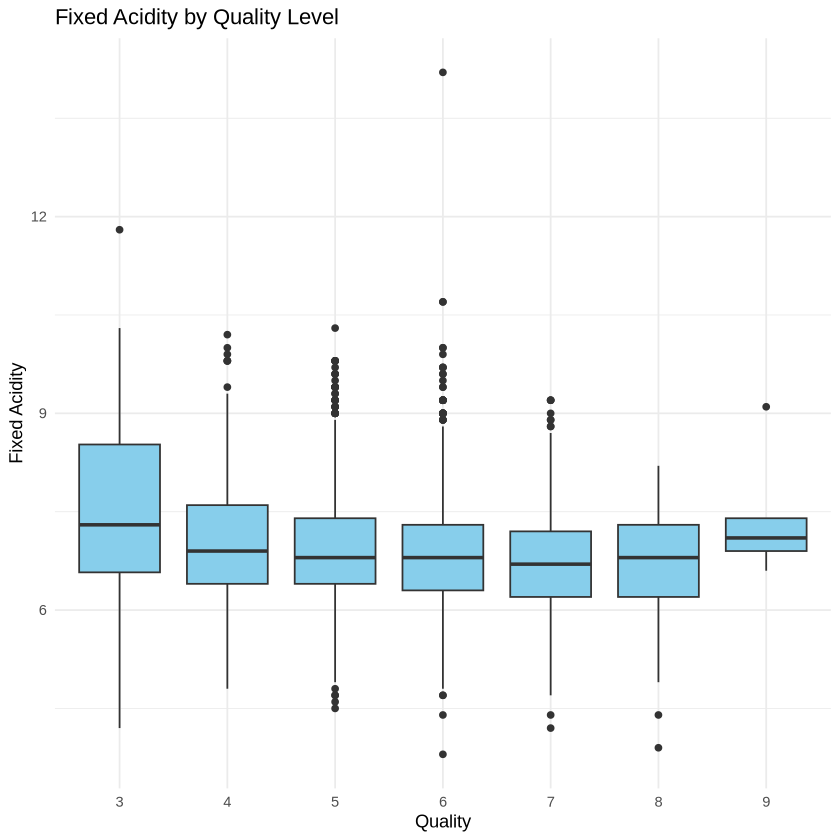

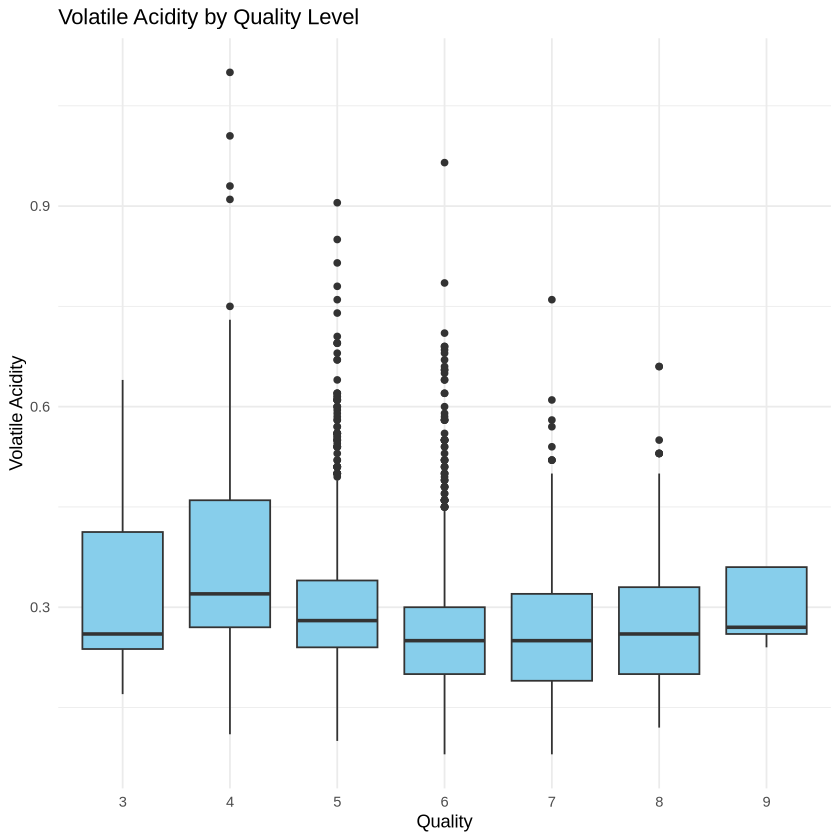

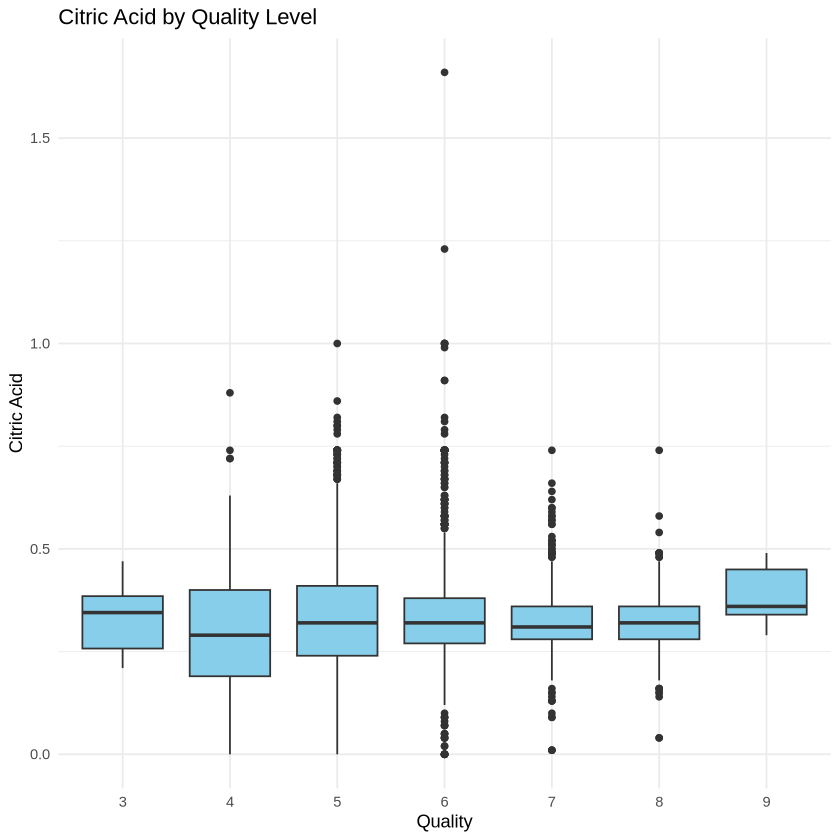

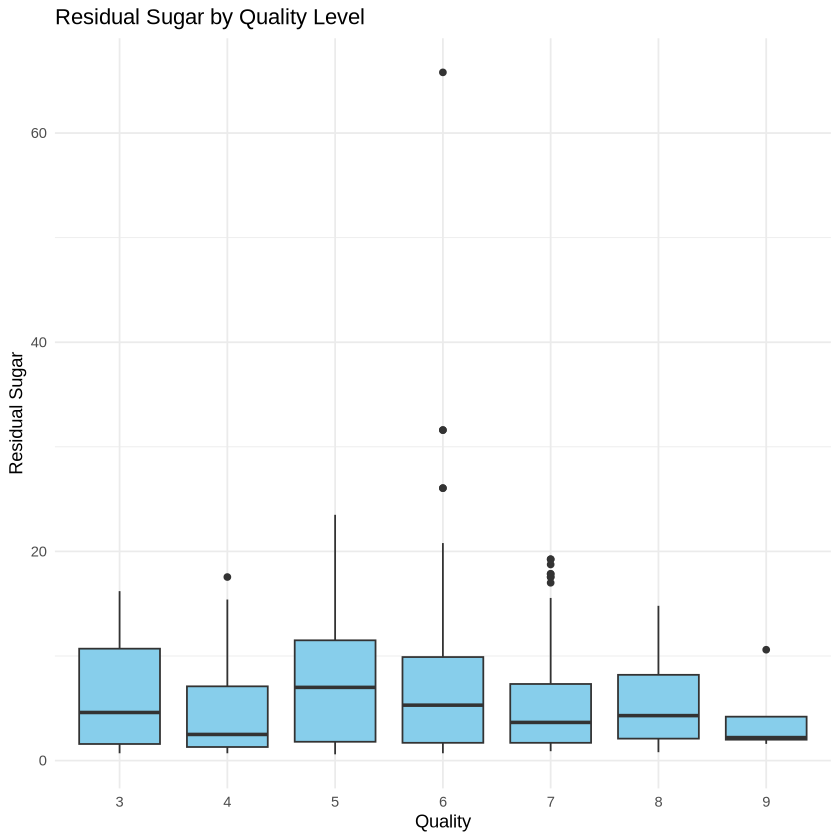

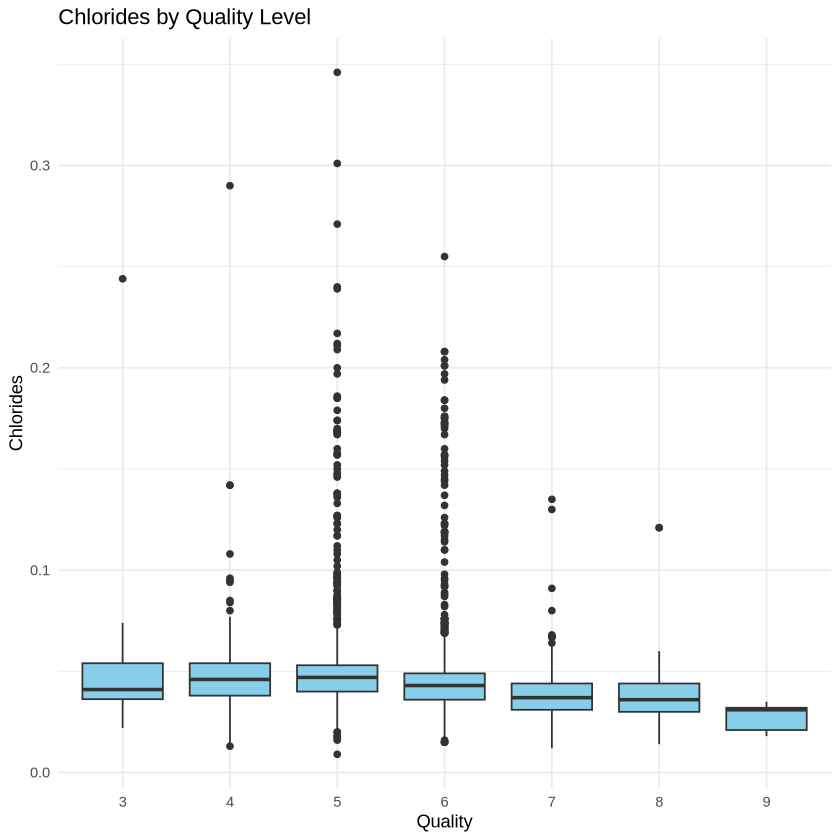

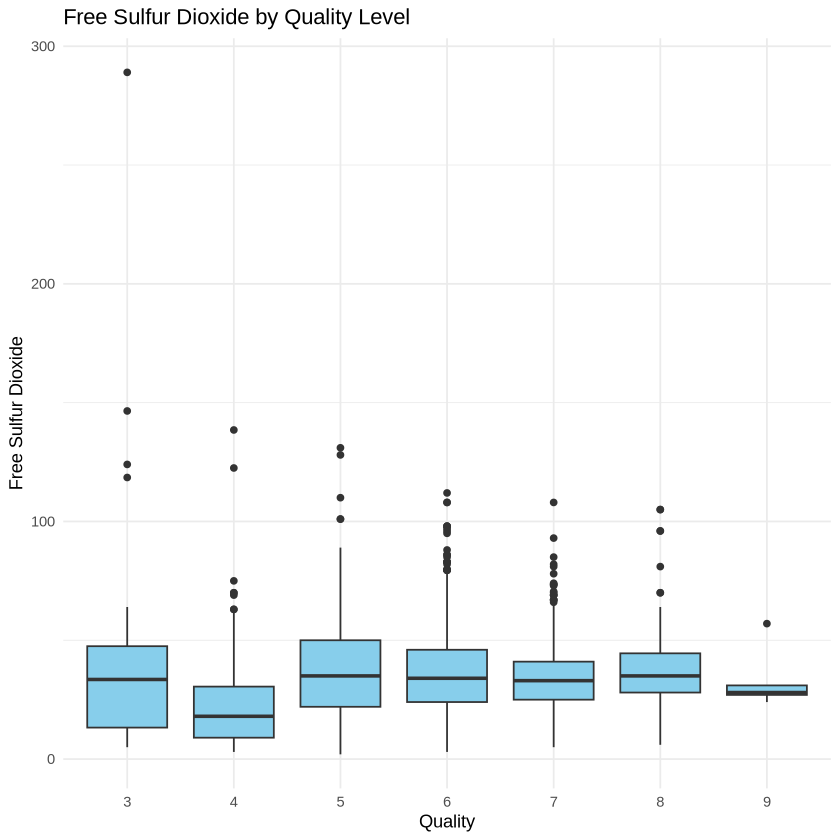

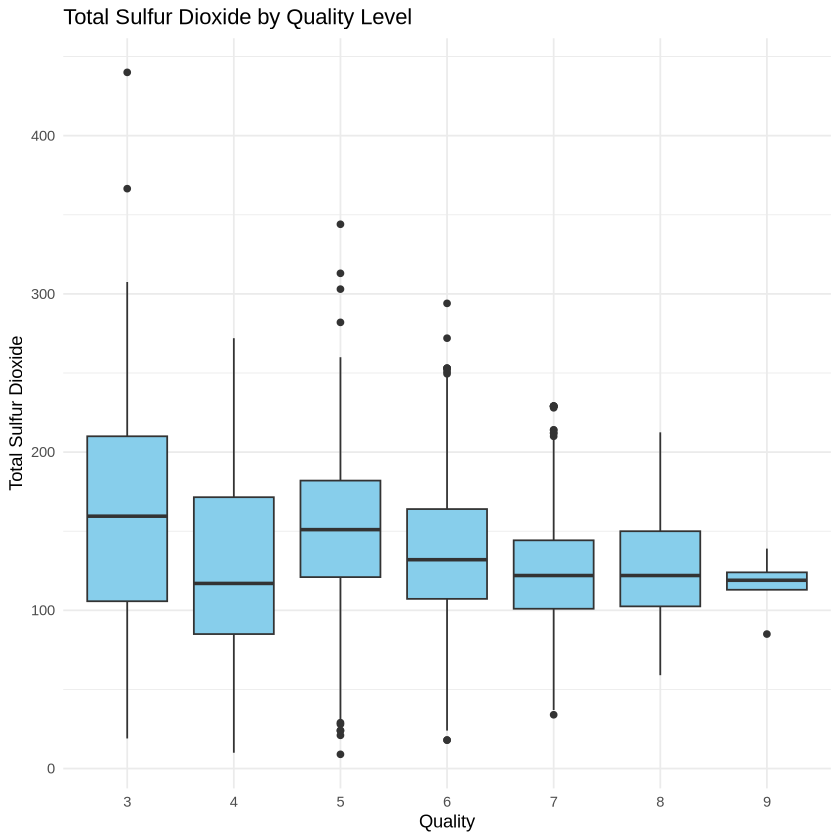

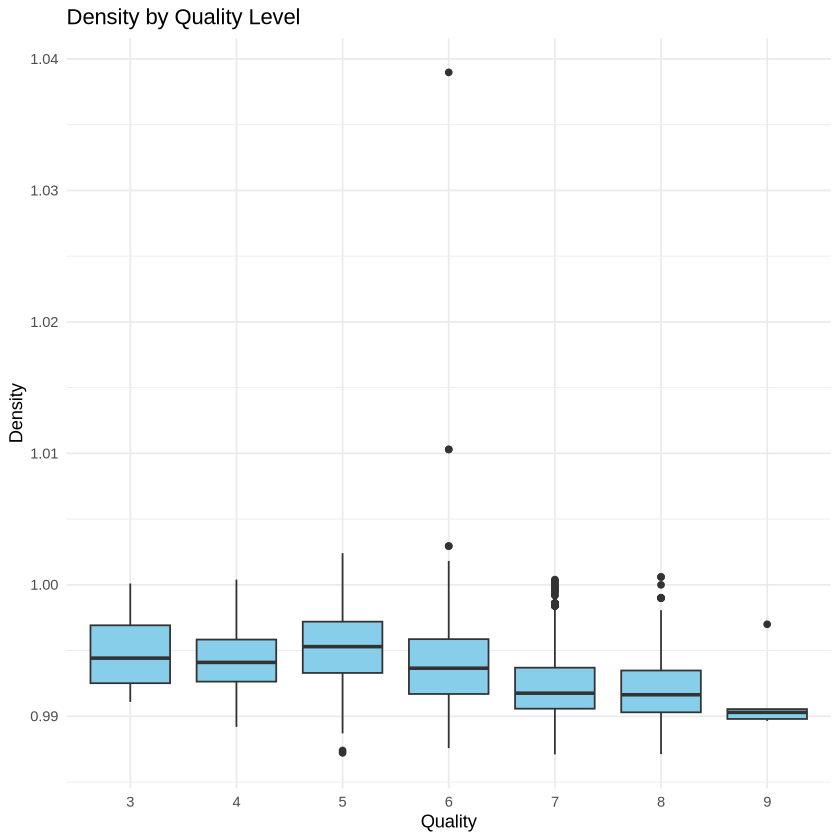

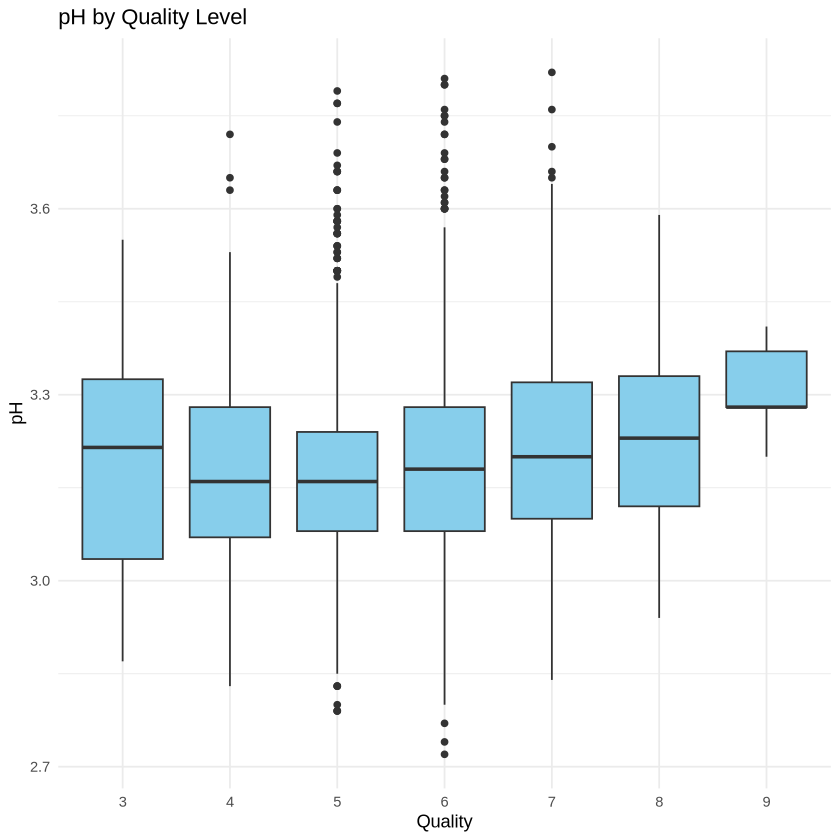

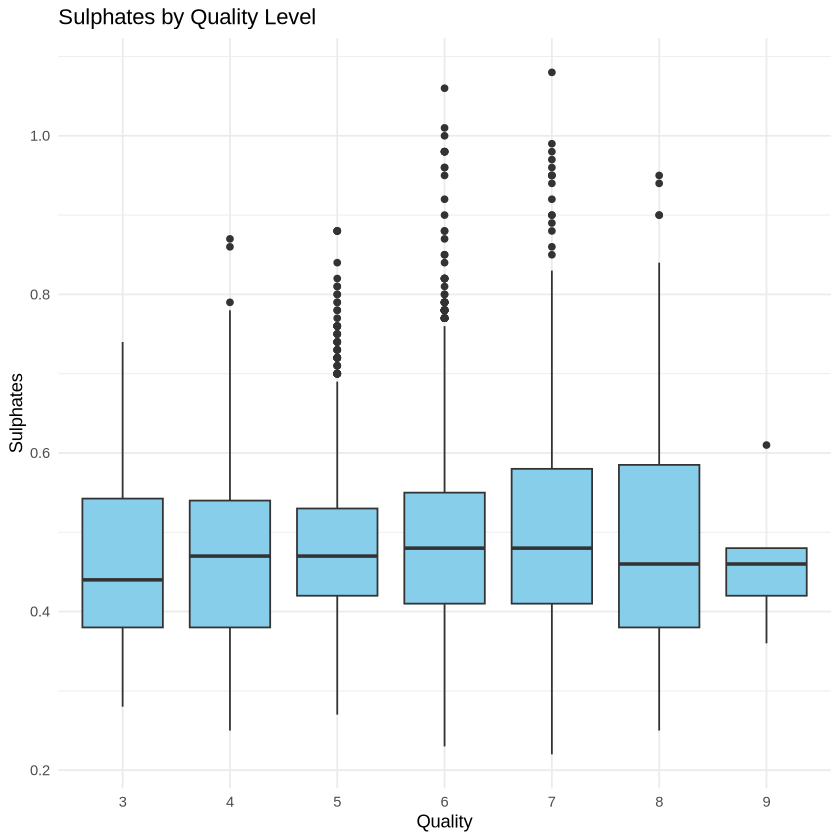

In [3]:
ggplot(white, aes(x = factor(quality))) +
  geom_bar(fill = "skyblue") +
  labs(title = "White Wine Quality Distribution", x = "Quality", y = "Count")

ggplot(white, aes(x = factor(quality), y = alcohol)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Alcohol by Quality Level", x = "Quality", y = "Alcohol") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = fixed.acidity)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Fixed Acidity by Quality Level", x = "Quality", y = "Fixed Acidity") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = volatile.acidity)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Volatile Acidity by Quality Level", x = "Quality", y = "Volatile Acidity") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = citric.acid)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Citric Acid by Quality Level", x = "Quality", y = "Citric Acid") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = residual.sugar)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Residual Sugar by Quality Level", x = "Quality", y = "Residual Sugar") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = chlorides)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Chlorides by Quality Level", x = "Quality", y = "Chlorides") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = free.sulfur.dioxide)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Free Sulfur Dioxide by Quality Level", x = "Quality", y = "Free Sulfur Dioxide") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = total.sulfur.dioxide)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Total Sulfur Dioxide by Quality Level", x = "Quality", y = "Total Sulfur Dioxide") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = density)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Density by Quality Level", x = "Quality", y = "Density") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = pH)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "pH by Quality Level", x = "Quality", y = "pH") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = sulphates)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Sulphates by Quality Level", x = "Quality", y = "Sulphates") +
  theme_minimal()

In [4]:
summary(white)
sum(is.na(white))

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

[1] 0

In [5]:
lm_full <- lm(quality ~ alcohol + fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides +
                 free.sulfur.dioxide + total.sulfur.dioxide + density + pH+sulphates, data = white)
vif_values <- vif(lm_full)
print(vif_values)
summary(lm_full)

             alcohol        fixed.acidity     volatile.acidity 
            7.706957             2.691435             1.141156 
         citric.acid       residual.sugar            chlorides 
            1.165215            12.644064             1.236822 
 free.sulfur.dioxide total.sulfur.dioxide              density 
            1.787880             2.239233            28.232546 
                  pH            sulphates 
            2.196362             1.138540 



Call:
lm(formula = quality ~ alcohol + fixed.acidity + volatile.acidity + 
    citric.acid + residual.sugar + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + density + pH + sulphates, data = white)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8348 -0.4934 -0.0379  0.4637  3.1143 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.502e+02  1.880e+01   7.987 1.71e-15 ***
alcohol               1.935e-01  2.422e-02   7.988 1.70e-15 ***
fixed.acidity         6.552e-02  2.087e-02   3.139  0.00171 ** 
volatile.acidity     -1.863e+00  1.138e-01 -16.373  < 2e-16 ***
citric.acid           2.209e-02  9.577e-02   0.231  0.81759    
residual.sugar        8.148e-02  7.527e-03  10.825  < 2e-16 ***
chlorides            -2.473e-01  5.465e-01  -0.452  0.65097    
free.sulfur.dioxide   3.733e-03  8.441e-04   4.422 9.99e-06 ***
total.sulfur.dioxide -2.857e-04  3.781e-04  -0.756  0.44979    
density              -1.503e+02  1.907

In [6]:
lm_without_density <- lm(quality ~ alcohol + fixed.acidity + volatile.acidity + citric.acid + chlorides +residual.sugar+
                 free.sulfur.dioxide + total.sulfur.dioxide + pH+sulphates, data = white)
vif_values2 <- vif(lm_without_density)
print(vif_values2)

             alcohol        fixed.acidity     volatile.acidity 
            1.647117             1.356128             1.128298 
         citric.acid            chlorides       residual.sugar 
            1.159884             1.203645             1.435215 
 free.sulfur.dioxide total.sulfur.dioxide                   pH 
            1.744627             2.153170             1.330912 
           sulphates 
            1.056637 


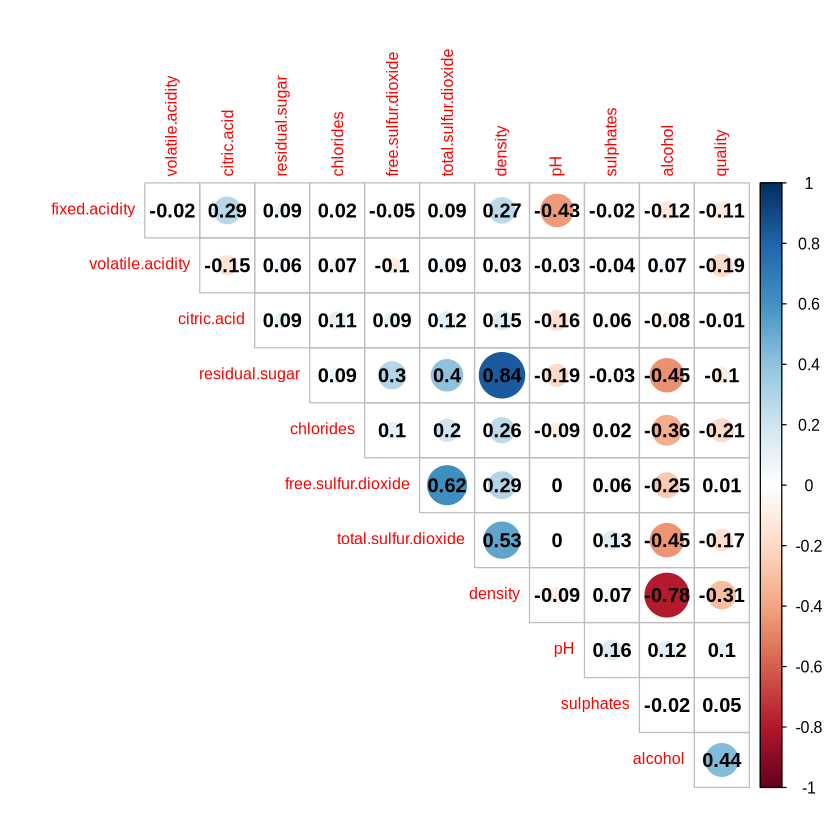

In [7]:
cor_matrix <- cor(white[, sapply(white, is.numeric)])
corrplot(cor_matrix, method = "circle", type = "upper", 
         tl.cex = 0.8, # Text label size
         addCoef.col = "black", # Add correlation coefficients on the plot
         diag = FALSE) # Hide the diagonal values